In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample


# Лабораторная работа 5.
Критерии качества. Кривая ошибок. Оценивание качества.
## Задание.
1. Подобрать таблицу данных с несбалансированными классами. Решить задачу классификации любым подходящим методом.
2. Вычислить точность, полноту, специфичность.
3. Построить кривую ошибок и найти площадь под ней. Построить для сравнения кривую "точность-полнота".
4. Разбить данные на обучающую и контрольную выборки. Построить ROC- кривую для каждой из подвыборок. Построить ROC- кривую на основе кроссвалидации.
5. Исследовать влияние выбора критерия обучения на AUC. Один из критериев — log loss, ещё один или два — на выбор. Как вариант: сравнить AdaBoost с градиентным бустингом.



Time: Это количество секунд, прошедших между данной транзакцией и первой транзакцией в наборе данных. Обычно это начинается с 0.

V1, V2, V3, ... V28: Это анонимизированные признаки, полученные после процесса главных компонент (PCA), который был применен к оригинальным данным для обеспечения конфиденциальности клиентов. Эти признаки содержат числовые значения и представляют собой результат анализа данных транзакций. По сути, это числовые характеристики, созданные на основе оригинальных данных, но без конкретной идентифицирующей информации.

Amount: Это сумма транзакции.

Class: Это целевая переменная, которая указывает, является ли транзакция мошеннической или нет. Значение 0 обозначает нормальную транзакцию, а значение 1 обозначает мошенническую транзакцию.

Class
0    100000
1       492
Name: count, dtype: int64
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0   

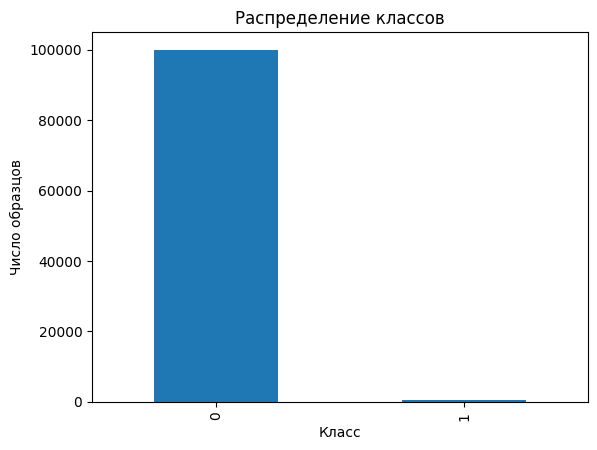

In [13]:
# Загрузка датасета
data = pd.read_csv("creditcard.csv")

# Разделите данные на два класса: нормальные транзакции (Class 0) и мошеннические транзакции (Class 1)
normal_transactions = data[data["Class"] == 0]
fraud_transactions = data[data["Class"] == 1]

normal_downsampled = resample(normal_transactions, n_samples=100000, random_state=42)

# Объедините сокращенные нормальные транзакции и все мошеннические транзакции
small_data = pd.concat([normal_downsampled, fraud_transactions])

# Проверьте распределение классов
class_distribution = small_data['Class'].value_counts()
print(class_distribution)
print(data)
# посмотреть распределение

class_distribution.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Число образцов')
plt.show()

In [14]:
# Разделим данные на признаки (X) и целевую переменную (y)
small_data = small_data.sample(frac=1, random_state=42)

X = small_data.drop("Class", axis=1)
y = small_data["Class"]

# Разделите данные на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=4)
logistic_model.fit(X_train, y_train)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression(class_weight='balanced', n_jobs=4, random_state=42)

# 2

In [15]:
y_pred = logistic_model.predict(X_test)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [16]:
# матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

TN = conf_matrix[0, 0]  # TN
FP = conf_matrix[0, 1]  # FP
FN = conf_matrix[1, 0]  # FN
TP = conf_matrix[1, 1]  # TP

precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

accuracy = (TP + TN) / (TP + FP + TN + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision) # оценивает, насколько предсказания положительного класса модели являются точными и не содержат ложных положительных предсказаний.
print("Recall:", recall) # оценивает, насколько много положительных случаев модель способна обнаруживать и не упускать.
print("Specificity:", f"{specificity:.2f}") # измеряет способность модели правильно классифицировать негативные образцы
# print("-------------------")
# print("Accuracy:", accuracy) # показывает долю правильных предсказаний относительно общего числа предсказаний
# print("F1 Score:", f1)
# sensitivity = TP / (TP + FN)

Precision: 0.08986415882967608
Recall: 0.945054945054945
Specificity: 0.96


# 3

Кривая работы приёмника и оператора (ROC-кривая) - это графическая метрика, используемая для оценки производительности модели классификации, особенно в контексте бинарной классификации (где есть два класса: положительный и отрицательный). ROC-кривая отображает отношение между чувствительностью (Recall) и специфичностью (Specificity) модели при различных порогах классификации.

Вот что показывает ROC-кривая:

Чувствительность (Recall) на оси y: Отображает способность модели обнаруживать положительные случаи. Чем выше точка на ROC-кривой, тем выше чувствительность модели при данном пороге.

1 - Специфичность на оси x: Отображает способность модели избегать ложных срабатываний при классификации отрицательных случаев. Чем ближе точка к левому верхнему углу ROC-кривой, тем выше специфичность модели.

ROC-кривая предоставляет информацию о производительности модели при различных порогах классификации. Идеальная ROC-кривая была бы диагональной линией от левого нижнего угла к правому верхнему углу (где чувствительность и специфичность равны 1), но на практике это редко бывает.

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


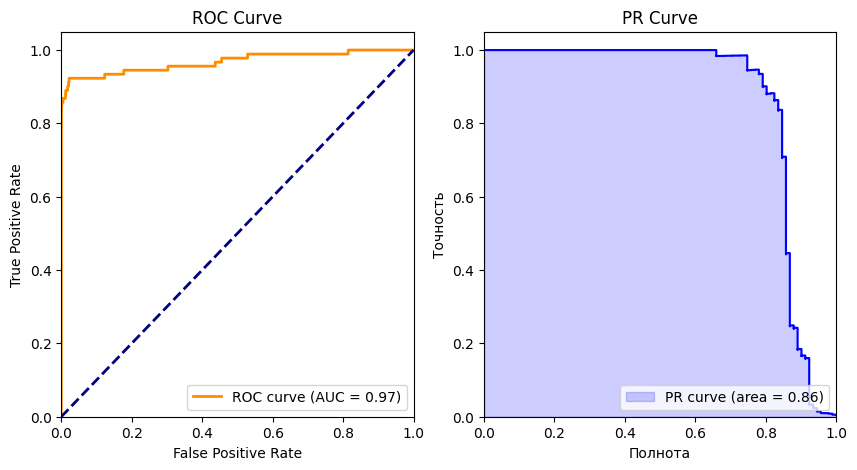

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, precision_recall_curve, auc

# класс мошенника
y_prob = logistic_model.predict_proba(X_test)[:, 1]
# Вычислим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Вычислим площадь под ROC-кривой (AUC-ROC)
auc_roc = roc_auc_score(y_test, y_prob)

# Вычислим PR-кривую
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 5))
# Построим ROC-кривую
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Построим PR-кривую
plt.subplot(1, 2, 2)
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b', label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('PR Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.show()

# 4

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: Converge

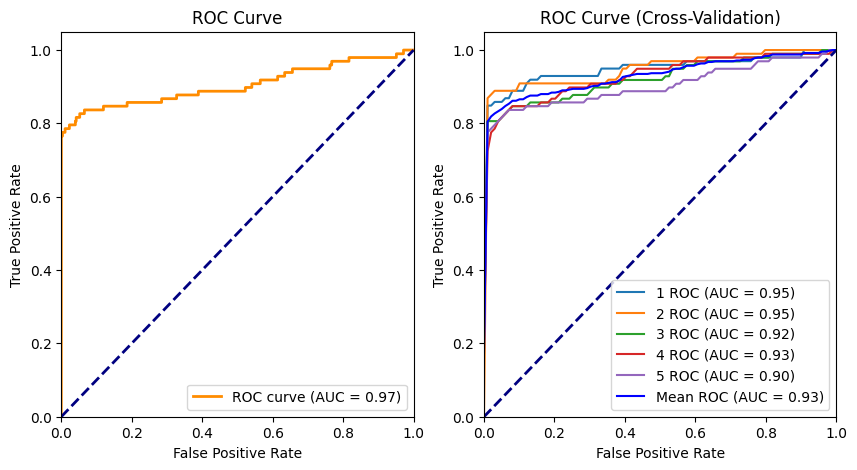

In [23]:
from sklearn.model_selection import StratifiedKFold

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

for train, test in cv.split(X, y):
    model = LogisticRegression()
    model.fit(X.iloc[train], y.iloc[train])
    y_prob = model.predict_proba(X.iloc[test])[:, 1]
    fpr, tpr, thresholds = roc_curve(y.iloc[test], y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

# вывод
plt.figure(figsize=(10, 5))
# Построим ROC-кривую
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(mean_fpr, tprs[0], label='1 ROC (AUC = {:.2f})'.format(auc(mean_fpr, tprs[0])))
plt.plot(mean_fpr, tprs[1], label='2 ROC (AUC = {:.2f})'.format(auc(mean_fpr, tprs[1])))
plt.plot(mean_fpr, tprs[2], label='3 ROC (AUC = {:.2f})'.format(auc(mean_fpr, tprs[2])))
plt.plot(mean_fpr, tprs[3], label='4 ROC (AUC = {:.2f})'.format(auc(mean_fpr, tprs[3])))
plt.plot(mean_fpr, tprs[4], label='5 ROC (AUC = {:.2f})'.format(auc(mean_fpr, tprs[4])))

plt.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.2f})'.format(mean_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cross-Validation)')
plt.legend(loc="lower right")
plt.show()

# 5

Исследовать влияние выбора критерия обучения на AUC. Один из критериев — log loss, ещё один или два — на выбор. Как вариант: сравнить AdaBoost с градиентным бустингом.

In [146]:
from sklearn.metrics import log_loss, classification_report, roc_curve, precision_recall_curve, auc, average_precision_score, hinge_loss, hamming_loss

# Создайте список критериев, которые вы хотите сравнить
criteria = ['log_loss', 'hinge', 'modified_huber']

# Создайте пустой словарь для хранения результатов AUC для каждого критерия
auc_scores = {}

roc_aucs_train = []
roc_aucs_valid = []
log_loss_valid = []
hinge_loss_valid = []
hamming_loss_valid = []

vals = np.arange(1000, len(X), 500)
print(len(X))

for num in vals:
    X_train, X_test, y_train, y_test = train_test_split(X[:num], y[:num], test_size=0.26, random_state=1)

    model = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    y_scores = model.decision_function(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_aucs_train.append(roc_auc)
  
    y_pred = model.predict(X_test)
    y_scores = model.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_aucs_valid.append(roc_auc)

    log = log_loss(y_test, y_scores)
    log_loss_valid.append(log)

    hamming = hamming_loss(y_test, y_pred)
    hamming_loss_valid.append(hamming)
    
    hinge = hinge_loss(y_test, y_scores)
    hinge_loss_valid.append(hinge)


100492


c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

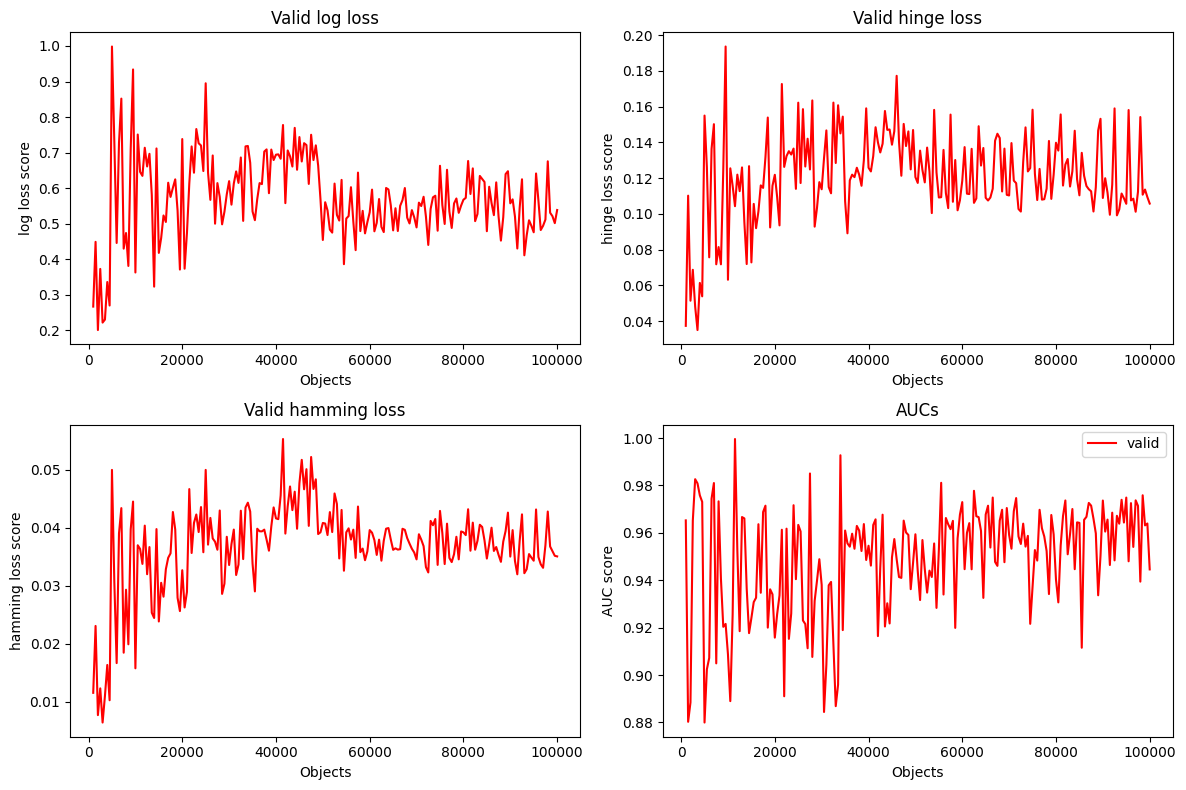

In [150]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.plot(vals, log_loss_valid, color='red')
plt.title("Valid log loss")
plt.xlabel("Objects")
plt.ylabel("log loss score")

plt.subplot(222)
plt.plot(vals, hinge_loss_valid, color='red')
plt.title("Valid hinge loss")
plt.xlabel("Objects")
plt.ylabel("hinge loss score")

plt.subplot(223)
plt.plot(vals, hamming_loss_valid, color='red')
plt.title("Valid hamming loss")
plt.xlabel("Objects")
plt.ylabel("hamming loss score")

plt.subplot(224)
plt.title("AUCs")
# plt.plot(vals, roc_aucs_train, color='green', label='train')
plt.plot(vals, roc_aucs_valid, color='red', label='valid')
plt.legend()
plt.xlabel("Objects")
plt.ylabel("AUC score")

plt.tight_layout()
plt.show()

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Загрузка данных
data = pd.read_csv('creditcard.csv')

# Разделение данных на обучающий и тестовый наборы
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей AdaBoost и градиентного бустинга
# с разными критериями обучения
ada_model = AdaBoostClassifier(n_estimators=5, learning_rate=1.0, algorithm='SAMME')
grad_boost_model = GradientBoostingClassifier(n_estimators=5, learning_rate=0.1, criterion='friedman_mse')

ada_model.fit(X_train, y_train)
grad_boost_model.fit(X_train, y_train)

# Предсказания на тестовом наборе
ada_predictions = ada_model.predict_proba(X_test)[:, 1]
grad_boost_predictions = grad_boost_model.predict_proba(X_test)[:, 1]

# Вычисление AUC-ROC для каждой модели
auc_ada = roc_auc_score(y_test, ada_predictions)
auc_grad_boost = roc_auc_score(y_test, grad_boost_predictions)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

AUC-ROC для AdaBoost: 0.9443634041264227
AUC-ROC для градиентного бустинга: 0.7753102102546138


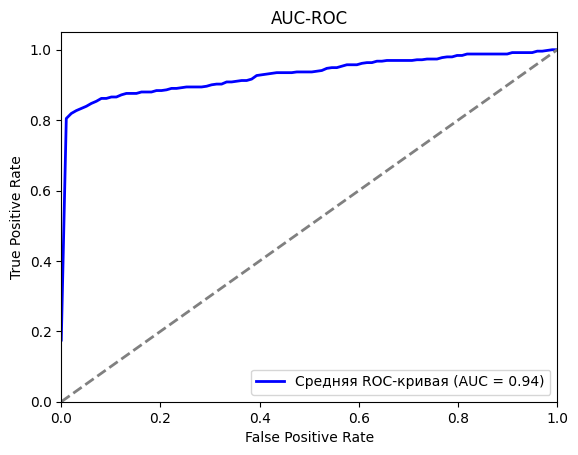

In [152]:
print("AUC-ROC для AdaBoost:", auc_ada)
print("AUC-ROC для градиентного бустинга:", auc_grad_boost)

plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label='Средняя ROC-кривая (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC')
plt.legend(loc="lower right")
plt.show()